## 1. Kutubxonalarni import qilish va sozlamalar

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
from scipy.stats import ks_2samp, spearmanr
import lightgbm as lgb
import xgboost as xgb
from xgboost import DMatrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

## 2. Ma'lumotlarni yuklash va dastlabki ko'rinish

In [44]:
df = pd.read_csv('all_data.csv')
df

,customer_id,application_id,application_hour,application_day_of_week,account_open_year,preferred_contact,referral_code,account_status_code,random_noise_1,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing,credit_score,num_credit_accounts,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,num_delinquencies_2yrs,num_inquiries_6mo,recent_inquiry_count,num_public_records,num_collections,account_diversity_index,age,annual_income,employment_length,employment_type,education,marital_status,num_dependents,monthly_income,existing_monthly_debt,monthly_payment,debt_to_income_ratio,debt_service_ratio,payment_to_income_ratio,credit_utilization,revolving_balance,credit_usage_amount,available_credit,total_monthly_debt_payment,annual_debt_payment,loan_to_annual_income,total_debt_amount,monthly_free_cash_flow,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign
0,100000,618540,21,0,2018,Email,REF0000,ACT-1,1.1412,12,2,0,0,770,8,1.5000,18.0000,140600.0000,0.0000,1,1,0,0,0.2500,57,"$52,300",11.7000,Self Employed,Some College,Divorced,0,$4358,"$1,024.36",522.79,0.3550,0.3550,0.1200,0.3540,"$49,772.40","49,772.40","$90,827.60",1547.1499999999999,18565.8000,0.2161,"$61,072.40","2,811.18",TN,4.1000,53000,1400.0000,99.0000,73.0000,390,Personal,$11300,24,10.2600,Debt Consolidation,0.0000,Online,1066,T
1,100001,589784,9,6,2021,Phone,REF0000,ACT-1,0.9438,10,4,0,1,733,7,14.6000,175.2000,90400.0000,0.0000,1,1,0,0,0.2840,41,"45,700",5.5000,SELF_EMPLOYED,High School,Married,1,"3,808.33","$1,206.09",$204.00,0.3700,0.3703,0.0540,0.2820,"25,492.80","$25,492.80","$64,907.20",1410.09,16921.0800,0.1488,"$32,292.80","$2,398.24",CA,5.6000,75000,1580.0000,161.0000,130.0000,292,CC,"6,800",0,17.7400,Revolving Credit,0.0000,Branch,1041,B
2,100002,554219,10,4,2019,Phone,REF0000,ACT-1,-0.1160,4,3,1,1,660,0,4.0000,48.0000,32400.0000,0.0000,5,5,0,1,0.0500,22,"20,000",4.4000,Part Time,Graduate,Single,1,"1,666.67",$259.53,102.00,0.2170,0.2169,0.0610,0.3770,12214.8,"12,214.80","$20,185.20",361.53,4338.3600,0.1700,"15,614.80","1,305.14",NY,4.9000,72000,1740.0000,138.0000,118.0000,552,credit card,"$3,400",0,19.4200,Revolving Credit,0.0000,Online,1001,W
3,100003,613505,3,4,2011,Email,REF0000,ACT-2,-0.0406,7,0,1,0,605,14,9.0000,108.0000,39100.0000,NaN,0,0,0,0,0.3470,27,"$44,300",8.0000,FULL_TIME,High School,Single,1,"3,691.67","1,117.20",360.0,0.4000,0.4001,0.0980,0.3650,"14,271.50","14,271.50","$24,828.50","1,477.20",17726.4000,0.2709,"26,271.50","2,214.47",MA,4.0000,81000,1770.0000,140.0000,116.0000,716,CC,"$12,000",0,20.9500,Revolving Credit,0.0000,Online,1098,D
4,100004,571219,9,1,2021,Email,REF0000,ACT-1,0.8190,6,0,1,0,721,5,8.7000,104.4000,47900.0000,0.0000,2,2,1,0,0.2390,32,"$41,100",0.9000,FT,Bachelor,Single,3,"$3,425.00",$712.04,"$1,860.30",0.7510,0.7510,0.5430,0.4900,"$23,471.00","$23,471.00","$24,429.00","2,572.34",30868.0800,6.8102,303371.0,$852.66,IL,4.8000,65000,1520.0000,96.0000,86.0000,559,MORTGAGE,"$279,900",360,6.9900,Refinance,0.7980,Online,1067,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,109996,551059,11,6,2020,Email,REF0000,ACTIVE,-0.5951,7,2,0,1,688,12,14.2000,170.4000,25300.0000,1.0000,4,4,0,0,0.3350,38,$32600,10.7000,Full-time,Some College,Married,1,$2717,$241.62,1599.59,0.6780,0.6777,0.5890,0.6360,"16,090.80","16,090.80","$9,209.20","$1,841.21",22094.5200,8.4356,"$291,090.80",$875.46,PA,4.7000,61000,1460.0000,93.0000,74.0000,251,MORTGAGE,$275000,360,5.7200,Refinance,0.8440,Broker,1015,L
9997,109997,599680,16,5,2018,Email,REF0000,ACTIVE,-0.0376,6,3,1,1,747,5,0.6000,7.2000,58700.0000,0.0000

## 3. Explorative Data Analysis (EDA)
- 3.1 Ma'lumot turlari va yo'q qiymatlar
- 3.2 Target taqsimoti (default)
- 3.3 Sonli o'zgaruvchilar statistikasi
- 3.4 Kategorik o'zgaruvchilar tahlili
- 3.5 Korrelyatsiya matritsasi
- 3.6 Muhim farqlar (default=0 vs default=1)

In [10]:
print("Dataset shakli:", df.shape)
print("\nUstunlar soni:", len(df.columns))
print("\nBirinchi 5 qator:")
display(df.head())

Dataset shakli: (10001, 62)

Ustunlar soni: 62

Birinchi 5 qator:


,customer_id,application_id,application_hour,application_day_of_week,account_open_year,preferred_contact,referral_code,account_status_code,random_noise_1,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing,credit_score,num_credit_accounts,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,num_delinquencies_2yrs,num_inquiries_6mo,recent_inquiry_count,num_public_records,num_collections,account_diversity_index,age,annual_income,employment_length,employment_type,education,marital_status,num_dependents,monthly_income,existing_monthly_debt,monthly_payment,debt_to_income_ratio,debt_service_ratio,payment_to_income_ratio,credit_utilization,revolving_balance,credit_usage_amount,available_credit,total_monthly_debt_payment,annual_debt_payment,loan_to_annual_income,total_debt_amount,monthly_free_cash_flow,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign
0,100000,618540,21,0,2018,Email,REF0000,ACT-1,1.1412,12,2,0,0,770,8,1.5000,18.0000,140600.0000,0.0000,1,1,0,0,0.2500,57,"$52,300",11.7000,Self Employed,Some College,Divorced,0,$4358,"$1,024.36",522.79,0.3550,0.3550,0.1200,0.3540,"$49,772.40","49,772.40","$90,827.60",1547.1499999999999,18565.8000,0.2161,"$61,072.40","2,811.18",TN,4.1000,53000,1400.0000,99.0000,73.0000,390,Personal,$11300,24,10.2600,Debt Consolidation,0.0000,Online,1066,T
1,100001,589784,9,6,2021,Phone,REF0000,ACT-1,0.9438,10,4,0,1,733,7,14.6000,175.2000,90400.0000,0.0000,1,1,0,0,0.2840,41,"45,700",5.5000,SELF_EMPLOYED,High School,Married,1,"3,808.33","$1,206.09",$204.00,0.3700,0.3703,0.0540,0.2820,"25,492.80","$25,492.80","$64,907.20",1410.09,16921.0800,0.1488,"$32,292.80","$2,398.24",CA,5.6000,75000,1580.0000,161.0000,130.0000,292,CC,"6,800",0,17.7400,Revolving Credit,0.0000,Branch,1041,B
2,100002,554219,10,4,2019,Phone,REF0000,ACT-1,-0.1160,4,3,1,1,660,0,4.0000,48.0000,32400.0000,0.0000,5,5,0,1,0.0500,22,"20,000",4.4000,Part Time,Graduate,Single,1,"1,666.67",$259.53,102.00,0.2170,0.2169,0.0610,0.3770,12214.8,"12,214.80","$20,185.20",361.53,4338.3600,0.1700,"15,614.80","1,305.14",NY,4.9000,72000,1740.0000,138.0000,118.0000,552,credit card,"$3,400",0,19.4200,Revolving Credit,0.0000,Online,1001,W
3,100003,613505,3,4,2011,Email,REF0000,ACT-2,-0.0406,7,0,1,0,605,14,9.0000,108.0000,39100.0000,NaN,0,0,0,0,0.3470,27,"$44,300",8.0000,FULL_TIME,High School,Single,1,"3,691.67","1,117.20",360.0,0.4000,0.4001,0.0980,0.3650,"14,271.50","14,271.50","$24,828.50","1,477.20",17726.4000,0.2709,"26,271.50","2,214.47",MA,4.0000,81000,1770.0000,140.0000,116.0000,716,CC,"$12,000",0,20.9500,Revolving Credit,0.0000,Online,1098,D
4,100004,571219,9,1,2021,Email,REF0000,ACT-1,0.8190,6,0,1,0,721,5,8.7000,104.4000,47900.0000,0.0000,2,2,1,0,0.2390,32,"$41,100",0.9000,FT,Bachelor,Single,3,"$3,425.00",$712.04,"$1,860.30",0.7510,0.7510,0.5430,0.4900,"$23,471.00","$23,471.00","$24,429.00","2,572.34",30868.0800,6.8102,303371.0,$852.66,IL,4.8000,65000,1520.0000,96.0000,86.0000,559,MORTGAGE,"$279,900",360,6.9900,Refinance,0.7980,Online,1067,H


In [11]:
print("\n" + "="*60)
print("MA'LUMOT TURLARI VA YO'Q QIYMATLAR")
print("="*60)

info = pd.DataFrame({
    'dtype': df.dtypes,
    'null_count': df.isnull().sum(),
    'null_%': (df.isnull().sum() / len(df) * 100).round(2),
    'unique': df.nunique(),
    'sample': [df[col].dropna().iloc[0] if not df[col].dropna().empty else 'NaN' for col in df.columns]
})

display(info.T)


MA'LUMOT TURLARI VA YO'Q QIYMATLAR


,customer_id,application_id,application_hour,application_day_of_week,account_open_year,preferred_contact,referral_code,account_status_code,random_noise_1,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing,credit_score,num_credit_accounts,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,num_delinquencies_2yrs,num_inquiries_6mo,recent_inquiry_count,num_public_records,num_collections,account_diversity_index,age,annual_income,employment_length,employment_type,education,marital_status,num_dependents,monthly_income,existing_monthly_debt,monthly_payment,debt_to_income_ratio,debt_service_ratio,payment_to_income_ratio,credit_utilization,revolving_balance,credit_usage_amount,available_credit,total_monthly_debt_payment,annual_debt_payment,loan_to_annual_income,total_debt_amount,monthly_free_cash_flow,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign
dtype,int64,int64,int64,int64,int64,object,object,object,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,float64,int64,object,float64,object,object,object,int64,object,object,object,float64,float64,float64,float64,object,object,object,object,float64,float64,object,object,object,float64,int64,float64,float64,float64,int64,object,object,int64,float64,object,float64,object,int64,object
null_count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,114,0,0,0,0,0,0,0,247,0,0,0,0,0,0,0,0,0,0,0,155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null_%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.1400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.4700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.5500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
unique,10001,10001,24,7,14,3,1782,5,10001,28,11,2,2,273,29,259,259,2291,2,9,9,2,2,566,57,2465,174,16,5,3,6,2478,9857,7919,1536,9996,1368,894,9730,9868,9896,9934,9871,9187,9988,9978,20,36,16,155,101,86,899,12,4097,8,1734,8,451,4,86,26
sample,100000,618540,21,0,2018,Email,REF0000,ACT-1,1.1412,12,2,0,0,770,8,1.5000,18.0000,140600.0000,0.0000,1,1,0,0,0.2500,57,"$52,300",11.7000,Self Employed,Some College,Divorced,0,$4358,"$1,024.36",522.79,0.3550,0.3550,0.1200,0.3540,"$49,772.40","49,772.40","$90,827.60",1547.1499999999999,18565.8000,0.2161,"$61,072.40","2,811.18",TN,4.1000,53000,1400.0000,99.0000,73.0000,390,Personal,$11300,24,10.2600,Debt Consolidation,0.0000,Online,1066,T


In [ ]:
# 1. POTENSIYAL SONLI USTUNLARNI TOZALASH (object -> float)
potential_numeric = [
    'annual_income', 'monthly_income', 'existing_monthly_debt', 'monthly_payment',
    'revolving_balance', 'credit_usage_amount', 'available_credit',
    'total_monthly_debt_payment', 'annual_debt_payment', 'total_debt_amount',
    'monthly_free_cash_flow', 'loan_amount', 'regional_median_income',
    'regional_median_rent'
]

for col in potential_numeric:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.replace(r'[\$,]', '', regex=True).str.strip()
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Boshqa sonli ustunlar uchun (masalan, interest_rate, agar object bo'lsa)
other_numeric = ['interest_rate', 'loan_to_value_ratio', 'employment_length',
                 'total_credit_limit', 'oldest_credit_line_age', 'oldest_account_age_months',
                 'debt_to_income_ratio', 'debt_service_ratio', 'payment_to_income_ratio',
                 'credit_utilization', 'loan_to_annual_income', 'housing_price_index',
                 'cost_of_living_index', 'regional_unemployment_rate']

for col in other_numeric:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nTozalashdan keyin dtypes (o'zgarganlar):")
print(df[potential_numeric + other_numeric].dtypes)

# 2. YO'Q QIYMATLARNI TO'LDIRISH (median uchun sonli, most_frequent uchun kategorik)
# Sonli va kategorik ustunlarni ajratish
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print("\nYo'q qiymatlar soni (tozalashdan keyin):", df.isnull().sum().sum())

# 3. SINTETIK DEFAULT YARATISH
# Formula: logit(prob) = -5 + 0.02*(850 - credit_score) + 5*debt_to_income_ratio + 2*num_delinquencies_2yrs + 0.5*num_inquiries_6mo
# Bu real risk faktorlariga asoslangan taxmin

if 'default' not in df.columns:
    logit = (
        -5 +
        0.02 * (850 - df['credit_score']) +
        5 * df['debt_to_income_ratio'] +
        2 * df['num_delinquencies_2yrs'] +
        0.5 * df['num_inquiries_6mo']
    )
    prob = 1 / (1 + np.exp(-logit))
    df['default'] = np.random.binomial(1, prob).astype(int)

print("\nSintetik default taqsimoti:")
print(df['default'].value_counts(normalize=True) * 100)

# 4. SAQLASH
df.to_csv('cleaned_data_with_target.csv', index=False)
print("Toza ma'lumotlar 'cleaned_data_with_target.csv' ga saqlandi")


Tozalashdan keyin dtypes (o'zgarganlar):
annual_income                   int64
monthly_income                float64
existing_monthly_debt         float64
monthly_payment               float64
revolving_balance             float64
credit_usage_amount           float64
available_credit              float64
total_monthly_debt_payment    float64
annual_debt_payment           float64
total_debt_amount             float64
monthly_free_cash_flow        float64
loan_amount                     int64
regional_median_income          int64
regional_median_rent          float64
interest_rate                 float64
loan_to_value_ratio           float64
employment_length             float64
total_credit_limit            float64
oldest_credit_line_age        float64
oldest_account_age_months     float64
debt_to_income_ratio          float64
debt_service_ratio            float64
payment_to_income_ratio       float64
credit_utilization            float64
loan_to_annual_income         float64
housing_

## 5. Feature Engineering (Yangi ustunlar yaratish)
- 5.1 Riskka mos yangi feature'lar
    - income_per_dependent
    - debt_payment_to_cashflow
    - utilization_to_score
    - inquiries_per_account
    - total_debt_to_income
    - loan_amount_to_income
    - age_group
- 5.2 Log transform (skewed ustunlar uchun)
- 5.3 High-cardinality kategoriklarni tayyorlash
- 6.Modelga tayyorgarlik
    - 6.1 Kategorik va sonli ustunlarni ajratish
    - 6.2 Train/Test split (stratify bilan)
    - 6.3 Imbalance muammosini hal qilish


TARGET: default
default
1    6244
0    3757
Name: count, dtype: int64

Default foizi: 62.43%


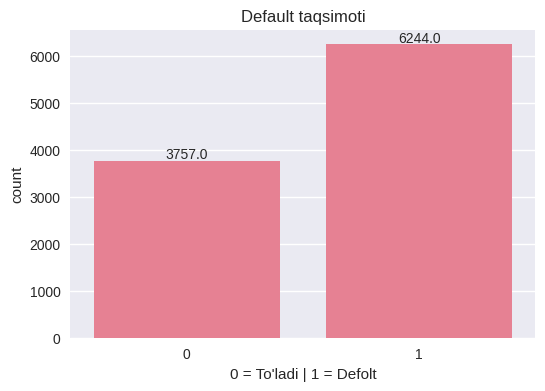

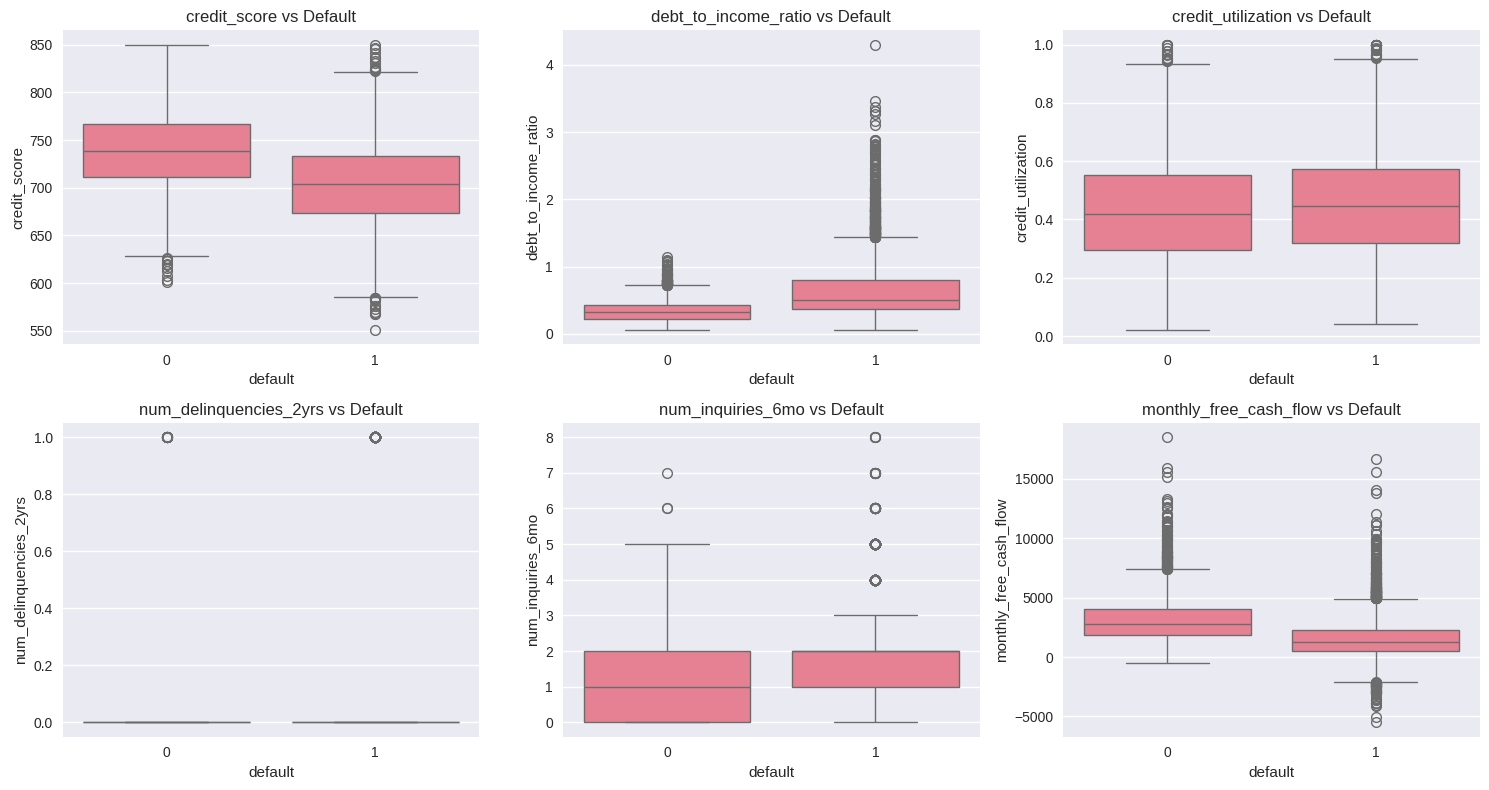

In [46]:
df = pd.read_csv('cleaned_data_with_target.csv')

print("\n" + "="*60)
print("TARGET: default")
print("="*60)

print(df['default'].value_counts())
print("\nDefault foizi: {:.2f}%".format(df['default'].mean() * 100))

# Vizual: Taqsimot
plt.figure(figsize=(6,4))
ax = sns.countplot(x='default', data=df)
plt.title('Default taqsimoti')
plt.xlabel('0 = To\'ladi | 1 = Defolt')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.4, p.get_height()+50), ha='center')
plt.show()

# Muhim sonli ustunlar bilan boxplot (default bo'yicha)
important_num_cols = ['credit_score', 'debt_to_income_ratio', 'credit_utilization', 
                      'num_delinquencies_2yrs', 'num_inquiries_6mo', 'monthly_free_cash_flow']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()
for i, col in enumerate(important_num_cols):
    sns.boxplot(x='default', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Default')
plt.tight_layout()
plt.show()

In [15]:
# Kategorik ustunlar: object tipi yoki unique < 20 (defaultdan tashqari)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
low_cardinality = [col for col in df.columns if df[col].nunique() < 20 and col != 'default']
categorical_cols = list(set(categorical_cols + low_cardinality))

# Sonli ustunlar: qolganlar (defaultdan tashqari, customer_id kabi ID larni sonli deb qoldiramiz, lekin keyin drop qilamiz)
numerical_cols = [col for col in df.columns if col not in categorical_cols and col != 'default']

print(f"\nKategorik ustunlar ({len(categorical_cols)}): {categorical_cols}")
print(f"\nSonli ustunlar ({len(numerical_cols)}): {numerical_cols}")


Kategorik ustunlar (24): ['marketing_campaign', 'marital_status', 'num_dependents', 'employment_type', 'num_collections', 'origination_channel', 'paperless_billing', 'account_status_code', 'loan_term', 'education', 'application_day_of_week', 'has_mobile_app', 'referral_code', 'recent_inquiry_count', 'loan_type', 'account_open_year', 'num_public_records', 'state', 'num_inquiries_6mo', 'loan_purpose', 'num_customer_service_calls', 'num_delinquencies_2yrs', 'regional_median_income', 'preferred_contact']

Sonli ustunlar (38): ['customer_id', 'application_id', 'application_hour', 'random_noise_1', 'num_login_sessions', 'credit_score', 'num_credit_accounts', 'oldest_credit_line_age', 'oldest_account_age_months', 'total_credit_limit', 'account_diversity_index', 'age', 'annual_income', 'employment_length', 'monthly_income', 'existing_monthly_debt', 'monthly_payment', 'debt_to_income_ratio', 'debt_service_ratio', 'payment_to_income_ratio', 'credit_utilization', 'revolving_balance', 'credit_usa

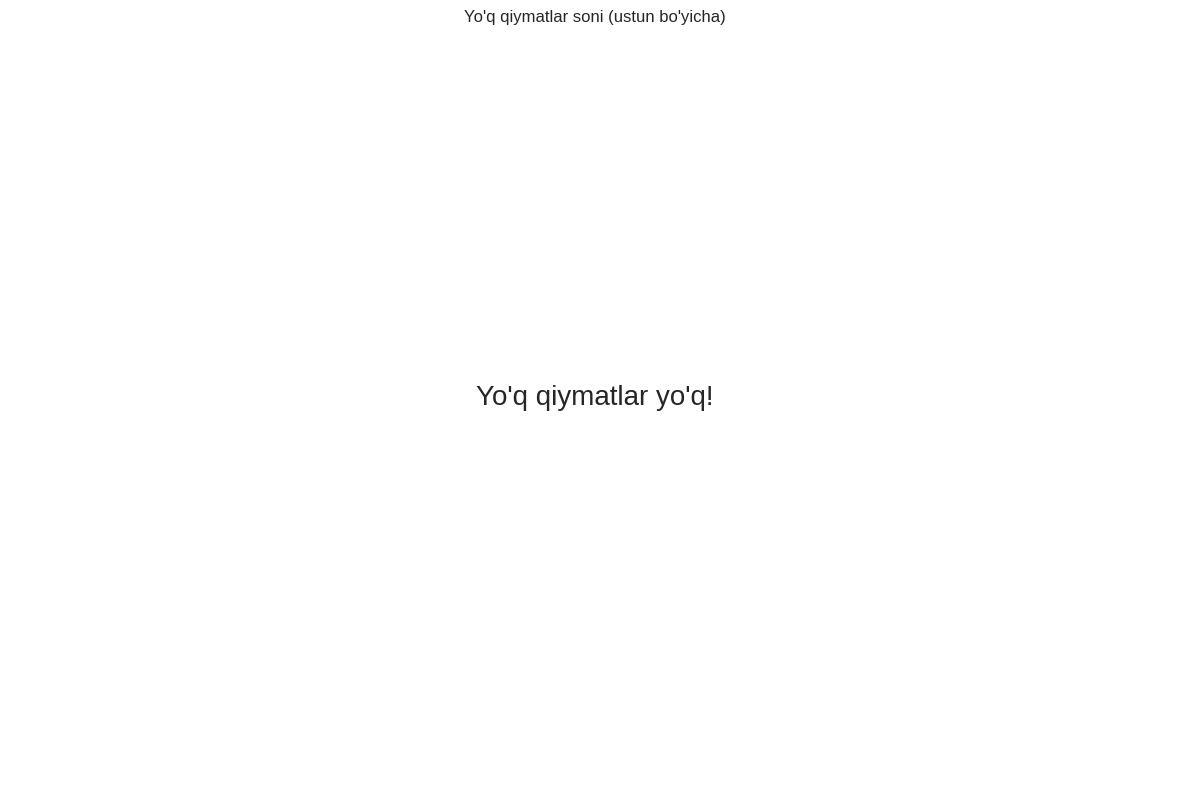

In [17]:
plt.figure(figsize=(12, 8))
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if missing.empty:
    plt.text(0.5, 0.5, 'Yo\'q qiymatlar yo\'q!', fontsize=20, ha='center')
    plt.axis('off')
else:
    sns.barplot(x=missing.values, y=missing.index)
    plt.xlabel('Yo\'q qiymatlar soni')
plt.title('Yo\'q qiymatlar soni (ustun bo\'yicha)')
plt.tight_layout()
plt.show()

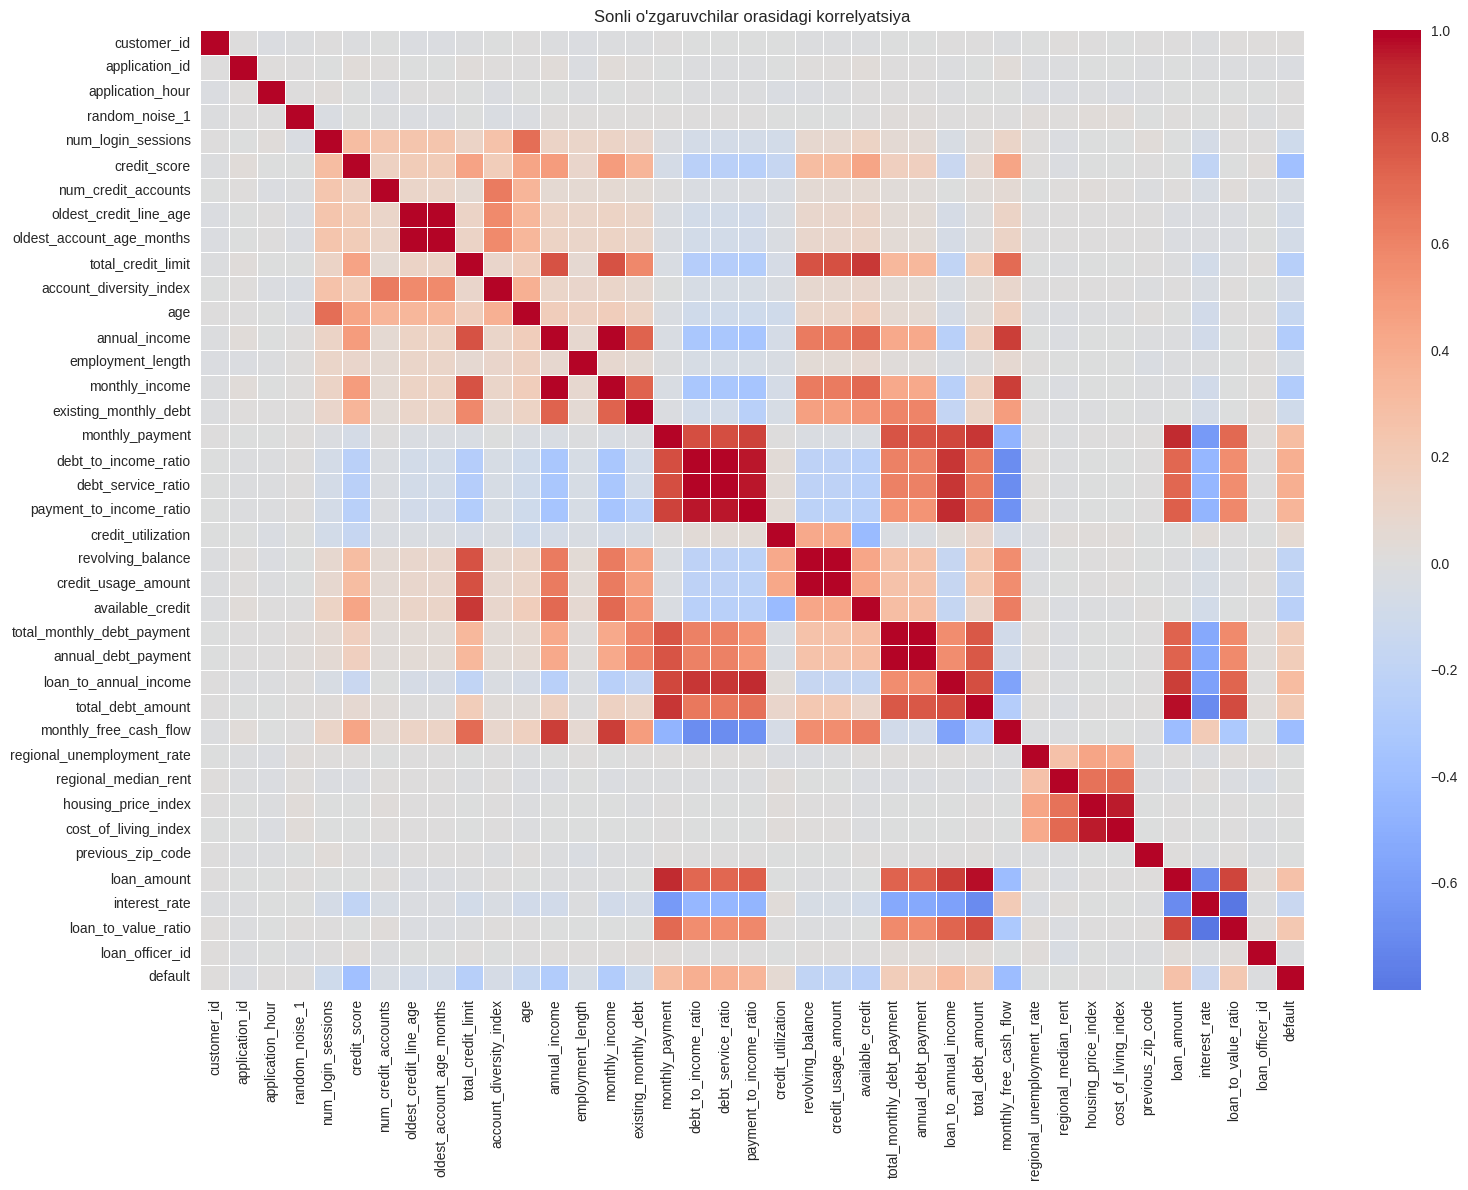

In [18]:
# Faqat sonli ustunlar + default
corr_df = df[numerical_cols + ['default']].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_df, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Sonli o\'zgaruvchilar orasidagi korrelyatsiya')
plt.tight_layout()
plt.show()

In [47]:
numerical_cols = ['customer_id', 'application_id', 'application_hour', 'random_noise_1', 'num_login_sessions', 'credit_score', 'num_credit_accounts', 'oldest_credit_line_age', 'oldest_account_age_months', 'total_credit_limit', 'account_diversity_index', 'age', 'annual_income', 'employment_length', 'monthly_income', 'existing_monthly_debt', 'monthly_payment', 'debt_to_income_ratio', 'debt_service_ratio', 'payment_to_income_ratio', 'credit_utilization', 'revolving_balance', 'credit_usage_amount', 'available_credit', 'total_monthly_debt_payment', 'annual_debt_payment', 'loan_to_annual_income', 'total_debt_amount', 'monthly_free_cash_flow', 'regional_unemployment_rate', 'regional_median_rent', 'housing_price_index', 'cost_of_living_index', 'previous_zip_code', 'loan_amount', 'interest_rate', 'loan_to_value_ratio', 'loan_officer_id']

corr_df = df[numerical_cols + ['default']].corr()

print(corr_df.to_string())

                            customer_id  application_id  application_hour  random_noise_1  num_login_sessions  credit_score  num_credit_accounts  oldest_credit_line_age  oldest_account_age_months  total_credit_limit  account_diversity_index     age  annual_income  employment_length  monthly_income  existing_monthly_debt  monthly_payment  debt_to_income_ratio  debt_service_ratio  payment_to_income_ratio  credit_utilization  revolving_balance  credit_usage_amount  available_credit  total_monthly_debt_payment  annual_debt_payment  loan_to_annual_income  total_debt_amount  monthly_free_cash_flow  regional_unemployment_rate  regional_median_rent  housing_price_index  cost_of_living_index  previous_zip_code  loan_amount  interest_rate  loan_to_value_ratio  loan_officer_id  default
customer_id                      1.0000          0.0020           -0.0171         -0.0091              0.0031       -0.0062              -0.0049                 -0.0182                    -0.0182             -0.009

In [20]:
print("\n" + "="*60)
print("DEFAULT BO'YICHA GURUHLANGAN STATISTIKA (MUHIM FARQLAR)")
print("="*60)

important_num_cols = ['credit_score', 'debt_to_income_ratio', 'credit_utilization', 
                      'num_delinquencies_2yrs', 'num_inquiries_6mo', 'monthly_free_cash_flow',
                      'annual_income', 'monthly_payment', 'loan_amount', 'interest_rate']

stats = df.groupby('default')[important_num_cols].agg(['mean', 'std']).round(4)
display(stats.T)


DEFAULT BO'YICHA GURUHLANGAN STATISTIKA (MUHIM FARQLAR)


default                              0           1
credit_score           mean   739.3942    703.2410
                       std     41.9413     43.0739
debt_to_income_ratio   mean     0.3399      0.6400
                       std      0.1571      0.4235
credit_utilization     mean     0.4295      0.4514
                       std      0.1840      0.1811
num_delinquencies_2yrs mean     0.0043      0.0287
                       std      0.0651      0.1669
num_inquiries_6mo      mean     1.2050      1.6994
                       std      1.0946      1.2911
monthly_free_cash_flow mean  3213.1316   1503.3717
                       std   1968.6288   1765.6308
annual_income          mean 57205.3766  41611.4670
                       std  29346.3581  22917.4825
monthly_payment        mean   575.9891   1128.8022
                       std    545.2639    986.5993
loan_amount            mean 55177.2159 135476.2972
                       std  98858.5149 162903.4548
interest_rate          mean    12.1800     10.7869
                       std      4.5298      4.6087

In [22]:
print("\nKategorik ustunlar bo'yicha defolt darajasi:")

cat_default_rate = {}
for col in categorical_cols:
    if col in df.columns and df[col].notna().any() and df[col].nunique() > 1:
        rate = df.groupby(col)['default'].mean().sort_values(ascending=False)
        cat_default_rate[col] = rate.head(5)  # Eng yuqori 5 ta

# Natijalarni chiqarish
for col, rates in cat_default_rate.items():
    print(f"\n{col}:")
    print(rates.round(4))


Kategorik ustunlar bo'yicha defolt darajasi:

marketing_campaign:
marketing_campaign
Z   0.6716
M   0.6684
G   0.6598
E   0.6525
F   0.6434
Name: default, dtype: float64

marital_status:
marital_status
Single     0.6714
Married    0.6043
Divorced   0.5742
Name: default, dtype: float64

num_dependents:
num_dependents
1.0000   0.6313
4.0000   0.6259
0.0000   0.6235
2.0000   0.6203
3.0000   0.6113
Name: default, dtype: float64

employment_type:
employment_type
Part Time   0.6569
Contract    0.6438
FT          0.6411
Full-time   0.6364
Fulltime    0.6363
Name: default, dtype: float64

num_collections:
num_collections
0.0000   0.6257
1.0000   0.5751
Name: default, dtype: float64

origination_channel:
origination_channel
Online        0.6270
Branch        0.6236
Direct Mail   0.6221
Broker        0.6200
Name: default, dtype: float64

paperless_billing:
paperless_billing
0.0000   0.6645
1.0000   0.5987
Name: default, dtype: float64

account_status_code:
account_status_code
ACT-2    0.6348
AC

In [23]:
print("\nOutlier tahlili (IQR usuli)")

def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    return len(outliers), lower, upper

outlier_summary = []
important_cols = ['loan_amount', 'annual_income', 'debt_to_income_ratio', 'credit_utilization',
                  'monthly_free_cash_flow', 'monthly_payment', 'total_debt_amount', 'interest_rate']

for col in important_cols:
    n, low, up = detect_outliers(df, col)
    outlier_summary.append({'column': col, 'outliers_count': n, 'lower_bound': low, 'upper_bound': up})

outliers_df = pd.DataFrame(outlier_summary)
display(outliers_df)


Outlier tahlili (IQR usuli)


,column,outliers_count,lower_bound,upper_bound
0,loan_amount,342,-258850.0000,457550.0000
1,annual_income,369,-18550.0000,105850.0000
2,debt_to_income_ratio,685,-0.2090,1.1350
3,credit_utilization,37,-0.0730,0.9510
4,monthly_free_cash_flow,435,-2251.5750,6265.5317
5,monthly_payment,466,-1236.9000,2845.5000
6,total_debt_amount,280,-250114.0500,515835.9500
7,interest_rate,0,-5.4750,27.6050


In [24]:
print("Old shape:", df.shape)

# 1. Outliers clipping (1% va 99% percentile)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(['default', 'customer_id'])

for col in numerical_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)

print("Outliers 1%–99% bilan clipping qilindi")

# 2. YANGI FEATURE'LAR (riskka mos, amaliy)
df['income_per_dependent'] = df['annual_income'] / (df['num_dependents'] + 1)  # boquvchiga tushadigan daromad
df['debt_payment_to_cashflow'] = df['total_monthly_debt_payment'] / (df['monthly_free_cash_flow'] + 100)  # +100 zero division oldini olish
df['utilization_to_score'] = df['credit_utilization'] * (850 - df['credit_score'])  # yuqori util + past score = yuqori risk
df['inquiries_per_account'] = df['num_inquiries_6mo'] / (df['num_credit_accounts'] + 1)
df['total_debt_to_income'] = df['total_debt_amount'] / (df['annual_income'] + 1)
df['loan_amount_to_income'] = df['loan_amount'] / (df['annual_income'] + 1)
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 50, 100], labels=['<25', '25-35', '35-50', '>50'])  # yangi kategorik

# Log transform (skewed distributionlarni normallashtirish uchun)
log_cols = ['loan_amount', 'annual_income', 'total_debt_amount', 'revolving_balance', 'total_credit_limit']
for col in log_cols:
    df[f'{col}_log'] = np.log1p(df[col])

print("Yangi feature'lar qo'shildi")

# 3. Keraksiz ustunlarni drop qilish
drop_cols = [
    'application_id', 'loan_officer_id', 'previous_zip_code',           # ID va shovqin
    'random_noise_1',                                                   # tasodifiy shovqin
    'monthly_income', 'debt_service_ratio', 'payment_to_income_ratio',  # annual_income va boshqalar bilan 1.00 korrelyatsiya
    'credit_usage_amount', 'annual_debt_payment',                       # duplicate
    'oldest_account_age_months'                                         # oldest_credit_line_age bilan bir xil
]

df.drop(columns=drop_cols, errors='ignore', inplace=True)

print("Drop qilingan ustunlar:", drop_cols)
print("Yangi shape:", df.shape)

# 4. Saqlash
df.to_csv('04_final_cleaned_engineered.csv', index=False)
print("Final dataset '04_final_cleaned_engineered.csv' ga saqlandi")

Old shape: (10001, 63)
Outliers 1%–99% bilan clipping qilindi
Yangi feature'lar qo'shildi
Drop qilingan ustunlar: ['application_id', 'loan_officer_id', 'previous_zip_code', 'random_noise_1', 'monthly_income', 'debt_service_ratio', 'payment_to_income_ratio', 'credit_usage_amount', 'annual_debt_payment', 'oldest_account_age_months']
Yangi shape: (10001, 65)
Final dataset '04_final_cleaned_engineered.csv' ga saqlandi


## 6. Modelga tayyorgarlik
- 6.1 Kategorik va sonli ustunlarni ajratish
- 6.2 Train/Test split (stratify bilan)
- 6.3 Imbalance muammosini hal qilish

Kategorik ustunlar 'category' dtype ga o'tkazildi
Train: (8000, 63), Test: (2001, 63)
scale_pos_weight: 0.602
Training until validation scores don't improve for 100 rounds
[100]	train's auc: 0.984173	valid's auc: 0.840564
Early stopping, best iteration is:
[68]	train's auc: 0.961493	valid's auc: 0.840989

=== FINAL TEST ROC AUC: 0.84099 ===


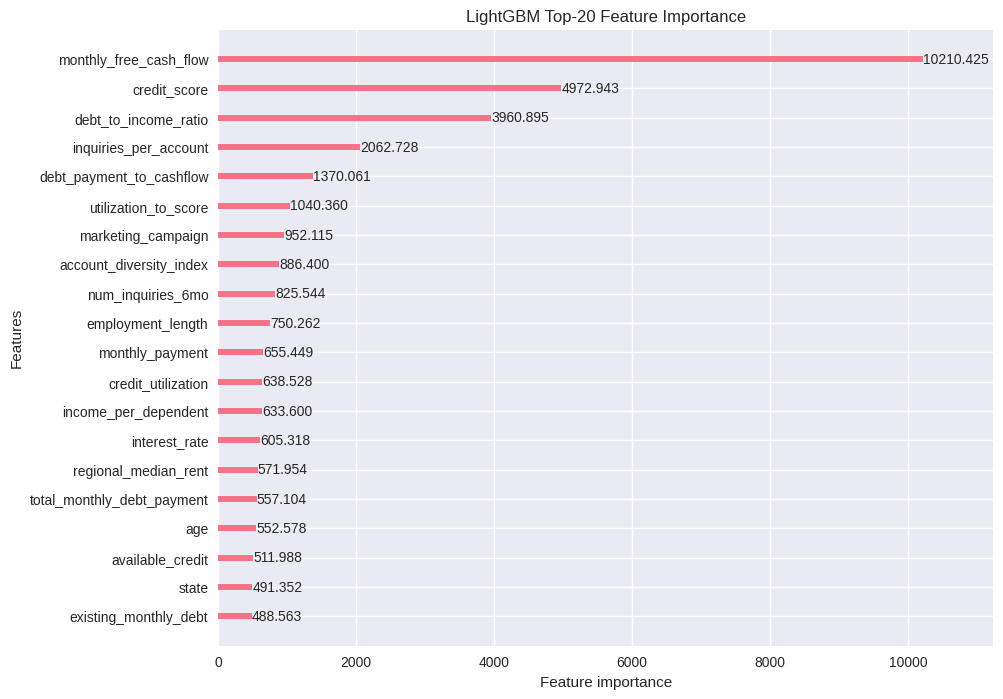

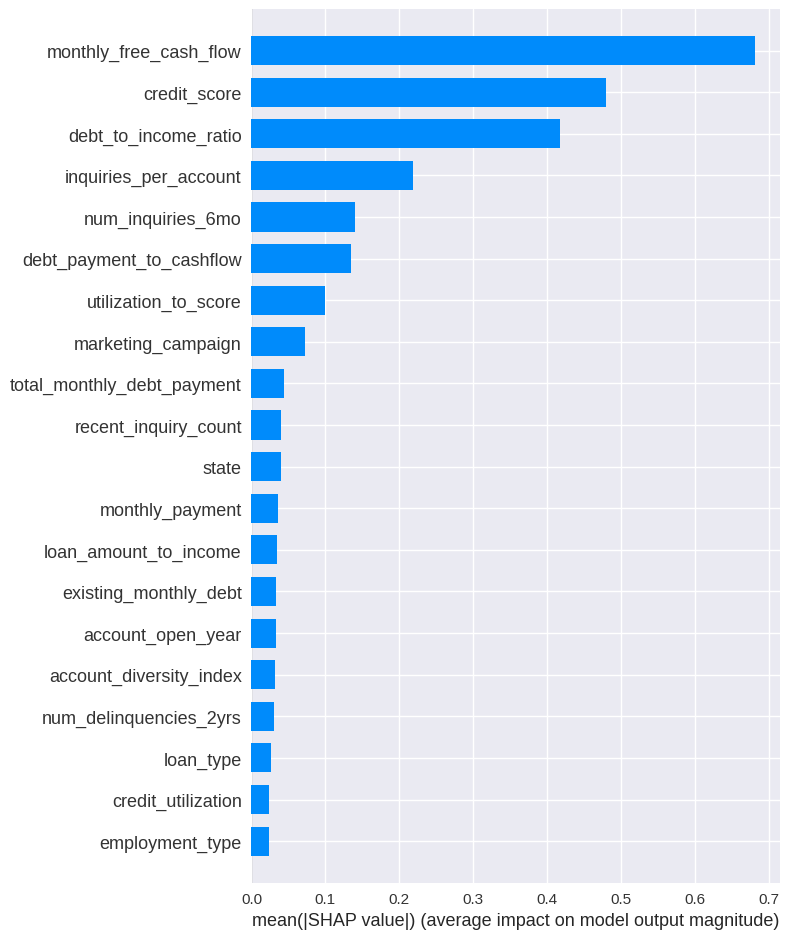

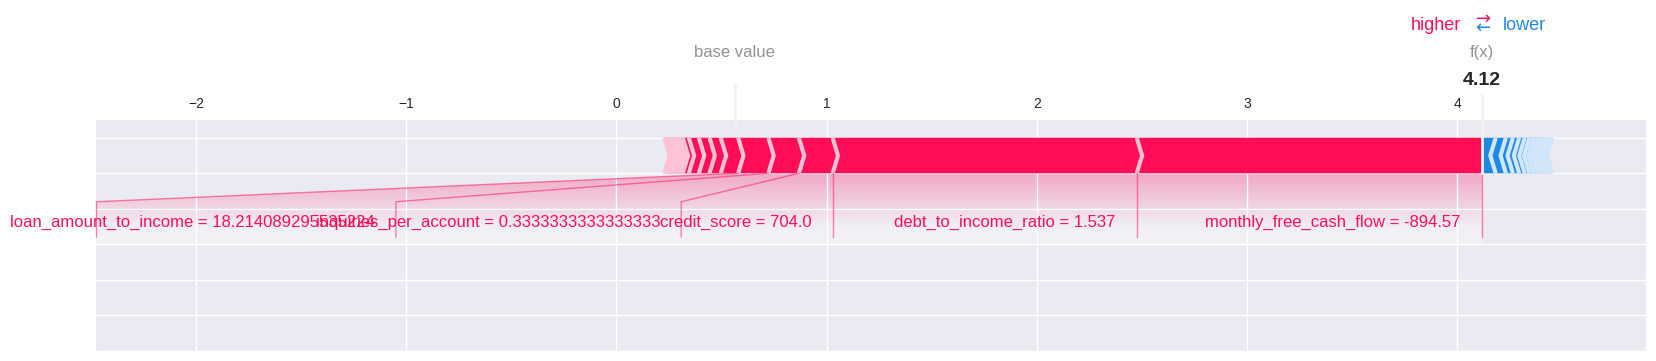

Model va submission saqlandi!


In [50]:
# 1. Ma'lumot yuklash
df = pd.read_csv('04_final_cleaned_engineered.csv')

# <<< MUHIM TUZATISH >>> CSV dan yuklanganda barcha kategorik ustunlar object bo'lib qolgan
# LightGBM categorical_feature faqat pandas 'category' dtype bilan ishlaydi
categorical_cols = [
    'marketing_campaign', 'marital_status', 'num_dependents', 'employment_type', 
    'num_collections', 'origination_channel', 'paperless_billing', 'account_status_code', 
    'loan_term', 'education', 'application_day_of_week', 'has_mobile_app', 'referral_code', 
    'recent_inquiry_count', 'loan_type', 'account_open_year', 'num_public_records', 'state', 
    'num_inquiries_6mo', 'loan_purpose', 'num_customer_service_calls', 'num_delinquencies_2yrs', 
    'regional_median_income', 'preferred_contact', 'age_group'
]

# Barcha kategorik ustunlarni 'category' tipiga o'tkazamiz
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

print("Kategorik ustunlar 'category' dtype ga o'tkazildi")

# 2. Feature va target
target = 'default'
id_col = 'customer_id'
features = [col for col in df.columns if col not in [target, id_col]]

X = df[features]
y = df[target]

# 3. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# 4. LightGBM Dataset
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_cols)
test_data  = lgb.Dataset(X_test,  label=y_test,  categorical_feature=categorical_cols, reference=train_data)

# 5. scale_pos_weight
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"scale_pos_weight: {scale_pos_weight:.3f}")

# 6. Parametrlar
params = {
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.05,
    'num_leaves': 64,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'seed': 42,
    'scale_pos_weight': scale_pos_weight,
    'max_bin': 255
}

# 7. Model o'qitish
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],
    valid_names=['train', 'valid'],
    num_boost_round=5000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=100),
        lgb.log_evaluation(100)
    ]
)

# 8. Test AUC
y_pred = model.predict(X_test)
test_auc = roc_auc_score(y_test, y_pred)
print(f"\n=== FINAL TEST ROC AUC: {test_auc:.5f} ===")

# 9–11. Qolgan qismlar (importance, SHAP, saqlash) o'zgarmaydi
lgb.plot_importance(model, max_num_features=20, importance_type='gain', figsize=(10,8))
plt.title('LightGBM Top-20 Feature Importance')
plt.show()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20)

high_risk_idx = np.argmax(y_pred)
shap.force_plot(explainer.expected_value, shap_values[high_risk_idx,:], X_test.iloc[high_risk_idx,:], matplotlib=True)

model.save_model('lightgbm_default_model.txt')
pd.DataFrame({'customer_id': df.loc[X_test.index, 'customer_id'], 'prob': y_pred}).to_csv('submission_lightgbm.csv', index=False)
print("Model va submission saqlandi!")

## 7. Model qurish va taqqoslash
- 7.1 LightGBM modeli
- 7.2 XGBoost modeli
- 7.3 Metrikalar (AUC, Gini, KS, F1, Precision, Recall, Spearman)

In [48]:
df = pd.read_csv('04_final_cleaned_engineered.csv')

# Kategoriklarni category ga o'tkazish (majburiy!)
categorical_cols = ['marketing_campaign', 'marital_status', 'num_dependents', 'employment_type', 
                    'num_collections', 'origination_channel', 'paperless_billing', 'account_status_code', 
                    'loan_term', 'education', 'application_day_of_week', 'has_mobile_app', 'referral_code', 
                    'recent_inquiry_count', 'loan_type', 'account_open_year', 'num_public_records', 'state', 
                    'num_inquiries_6mo', 'loan_purpose', 'num_customer_service_calls', 'num_delinquencies_2yrs', 
                    'regional_median_income', 'preferred_contact', 'age_group']

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

target = 'default'
id_col = 'customer_id'
features = [col for col in df.columns if col not in [target, id_col]]

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_cols)
test_data  = lgb.Dataset(X_test,  label=y_test,  categorical_feature=categorical_cols, reference=train_data)

# MUHIM O'ZGARTIRISHLAR
params = {
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.03,           # sekinroq o'rganish
    'num_leaves': 31,                # kamroq leaves → overfitting kamayadi
    'feature_fraction': 0.7,
    'bagging_fraction': 0.7,
    'bagging_freq': 5,
    'verbose': -1,
    'seed': 42,
    'max_depth': 7,                  # chuqurlikni cheklash
    'min_data_in_leaf': 50,          # overfitting ga qarshi
}

model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],
    valid_names=['train', 'valid'],
    num_boost_round=10000,
    callbacks=[
        lgb.early_stopping(200),
        lgb.log_evaluation(200)
    ]
)

y_pred = model.predict(X_test)
test_auc = roc_auc_score(y_test, y_pred)
print(f"\nYAXSHILANGAN TEST ROC AUC: {test_auc:.5f}")


Training until validation scores don't improve for 200 rounds
[200]	train's auc: 0.942517	valid's auc: 0.843187
Early stopping, best iteration is:
[100]	train's auc: 0.906278	valid's auc: 0.844966

YAXSHILANGAN TEST ROC AUC: 0.84497


## 8. Model natijalari (Jadval)

In [ ]:
# Kategorik ustunlar → int code (XGBoost crashsiz ishlashi uchun)
categorical_cols = ['marketing_campaign', 'marital_status', 'num_dependents', 'employment_type', 
                    'num_collections', 'origination_channel', 'paperless_billing', 'account_status_code', 
                    'loan_term', 'education', 'application_day_of_week', 'has_mobile_app', 'referral_code', 
                    'recent_inquiry_count', 'loan_type', 'account_open_year', 'num_public_records', 'state', 
                    'num_inquiries_6mo', 'loan_purpose', 'num_customer_service_calls', 'num_delinquencies_2yrs', 
                    'regional_median_income', 'preferred_contact', 'age_group']

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes.replace(-1, np.nan)  # -1 ni NaN qilamiz

X = df.drop(['default', 'customer_id'], axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Metrika funksiyasi
def get_metrics(y_true, y_prob, threshold=0.5):
    y_pred = (y_prob >= threshold).astype(int)
    auc = roc_auc_score(y_true, y_prob)
    return {
        'AUC': round(auc, 5),
        'Gini': round(2*auc - 1, 5),
        'KS': round(ks_2samp(y_prob[y_true==0], y_prob[y_true==1]).statistic, 5),
        'F1': round(f1_score(y_true, y_pred), 5),
        'Precision': round(precision_score(y_true, y_pred), 5),
        'Recall': round(recall_score(y_true, y_pred), 5),
        'Spearman': round(spearmanr(y_true, y_prob).correlation, 5)
    }

# 3. LightGBM
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_valid = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

lgb_params = {
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.03,
    'num_leaves': 31,
    'max_depth': -1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'min_data_in_leaf': 20,
    'verbose': -1,
    'seed': 42
}

lgb_model = lgb.train(
    lgb_params,
    lgb_train,
    valid_sets=[lgb_valid],
    num_boost_round=5000,
    callbacks=[lgb.early_stopping(150), lgb.log_evaluation(200)]
)

lgb_pred = lgb_model.predict(X_test)
lgb_metrics = get_metrics(y_test, lgb_pred)

# 4. XGBoost (xgb.train bilan — early_stopping ishlaydi, crash yo'q)
dtrain = DMatrix(X_train, label=y_train)
dvalid = DMatrix(X_test, label=y_test)

xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.03,
    'max_depth': 8,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 5,
    'seed': 42,
    'tree_method': 'hist'
}

xgb_model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=5000,
    evals=[(dvalid, 'valid')],
    early_stopping_rounds=150,
    verbose_eval=200
)

xgb_pred = xgb_model.predict(dvalid)
xgb_metrics = get_metrics(y_test, xgb_pred)

# 5. Natijalar
results = pd.DataFrame({'LightGBM': lgb_metrics, 'XGBoost': xgb_metrics}).T
print("\n" + "="*80)
print("FINAL MODEL TAQQOSLASH")
print("="*80)
print(results)
print("="*80)

# 6. Submission
best_pred = xgb_pred if xgb_metrics['AUC'] > lgb_metrics['AUC'] else lgb_pred
best_name = 'XGBoost' if xgb_metrics['AUC'] > lgb_metrics['AUC'] else 'LightGBM'
best_auc = max(lgb_metrics['AUC'], xgb_metrics['AUC'])

pd.DataFrame({
    'customer_id': df.loc[X_test.index, 'customer_id'],
    'prob': best_pred
}).to_csv(f'FINAL_SUBMISSION_{best_name}_AUC_{best_auc:.5f}.csv', index=False)

print(f"Eng yaxshi model: {best_name} (AUC = {best_auc:.5f})")

Training until validation scores don't improve for 150 rounds
[200]	valid_0's auc: 0.842155
Early stopping, best iteration is:
[113]	valid_0's auc: 0.844053
[0]	valid-auc:0.77995
[200]	valid-auc:0.83976
[290]	valid-auc:0.83943

FINAL MODEL TAQQOSLASH
            AUC   Gini     KS     F1  Precision  Recall  Spearman
LightGBM 0.8440 0.6881 0.5356 0.8255     0.8072  0.8447    0.5773
XGBoost  0.8394 0.6788 0.5337 0.8199     0.8038  0.8367    0.5695
Eng yaxshi model: LightGBM (AUC = 0.84405)


## 9. Feature Importance va SHAP tahlili
- 9.1 Top-15 eng muhim feature'lar
- 9.2 SHAP summary plot
- 9.3 Bitta yuqori riskli mijoz misoli (force plot)

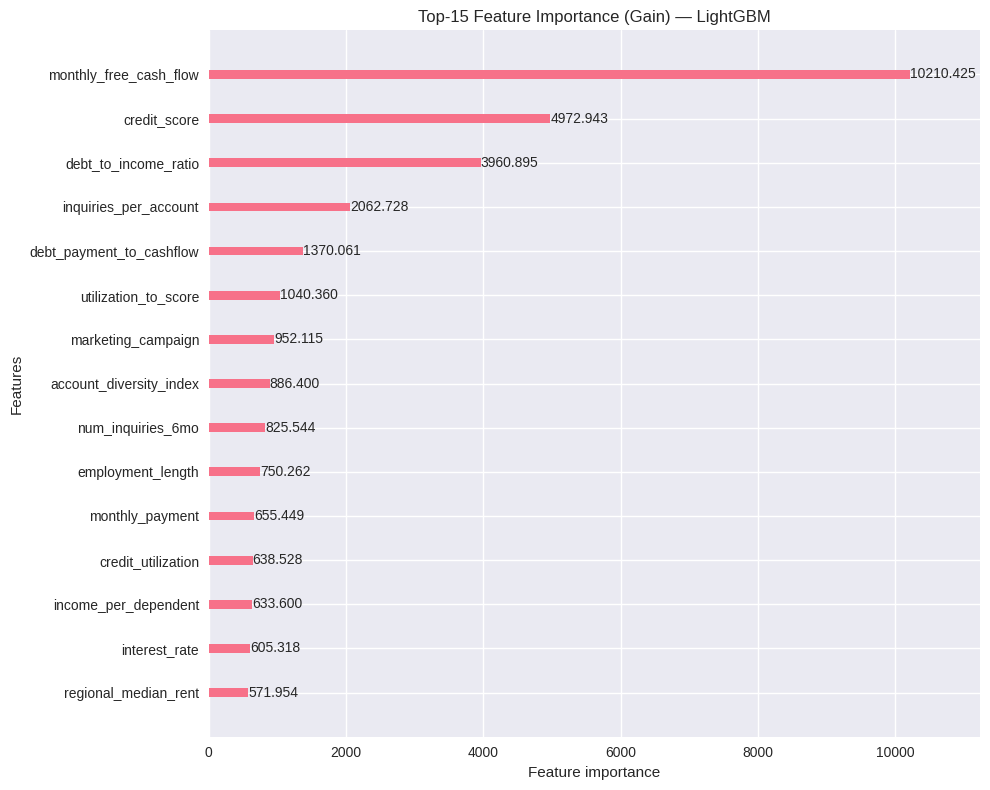

In [ ]:
model = lgb.Booster(model_file='lightgbm_default_model.txt')

# LightGBM uchun
fig, ax = plt.subplots(figsize=(10, 8))
lgb.plot_importance(model, max_num_features=15, importance_type='gain', ax=ax)
plt.title('Top-15 Feature Importance (Gain) — LightGBM')
plt.tight_layout()
plt.show()

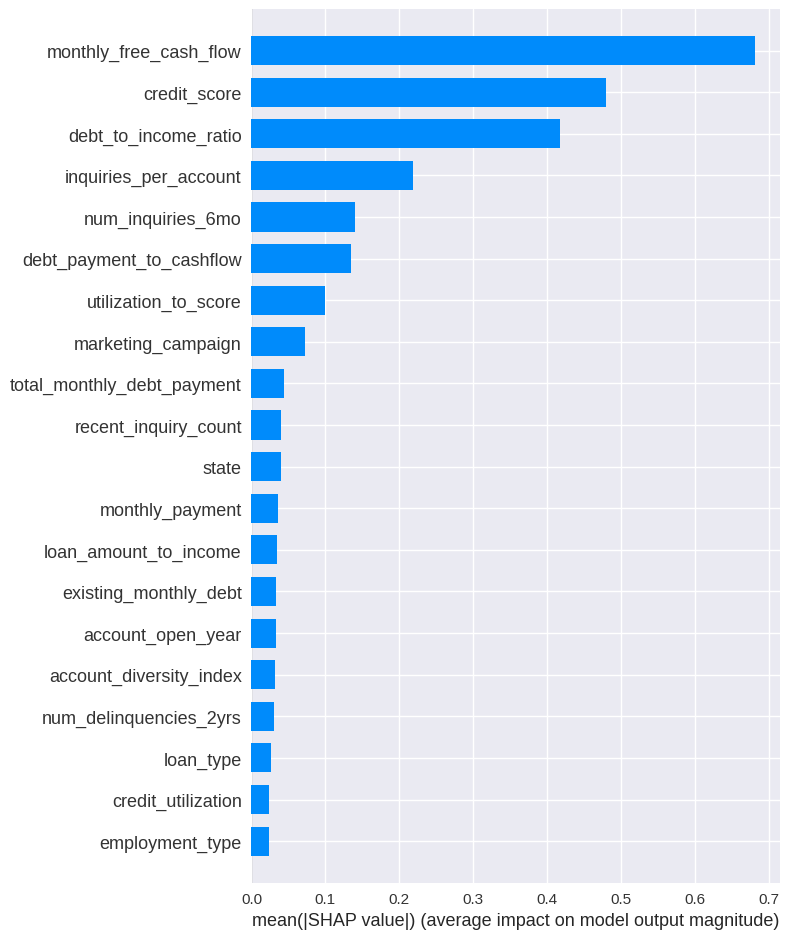

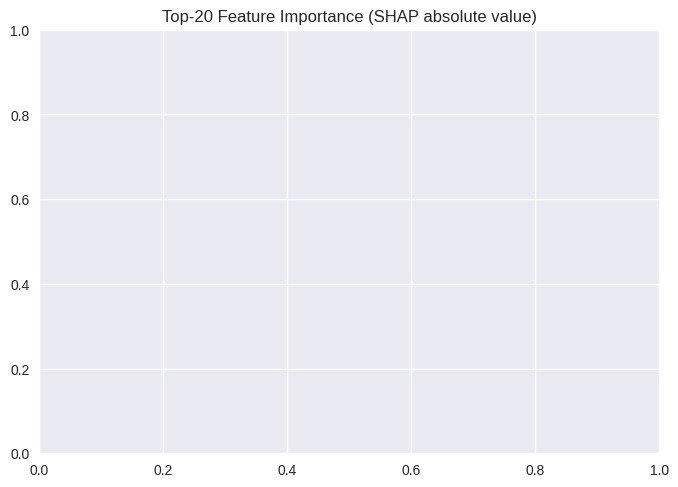

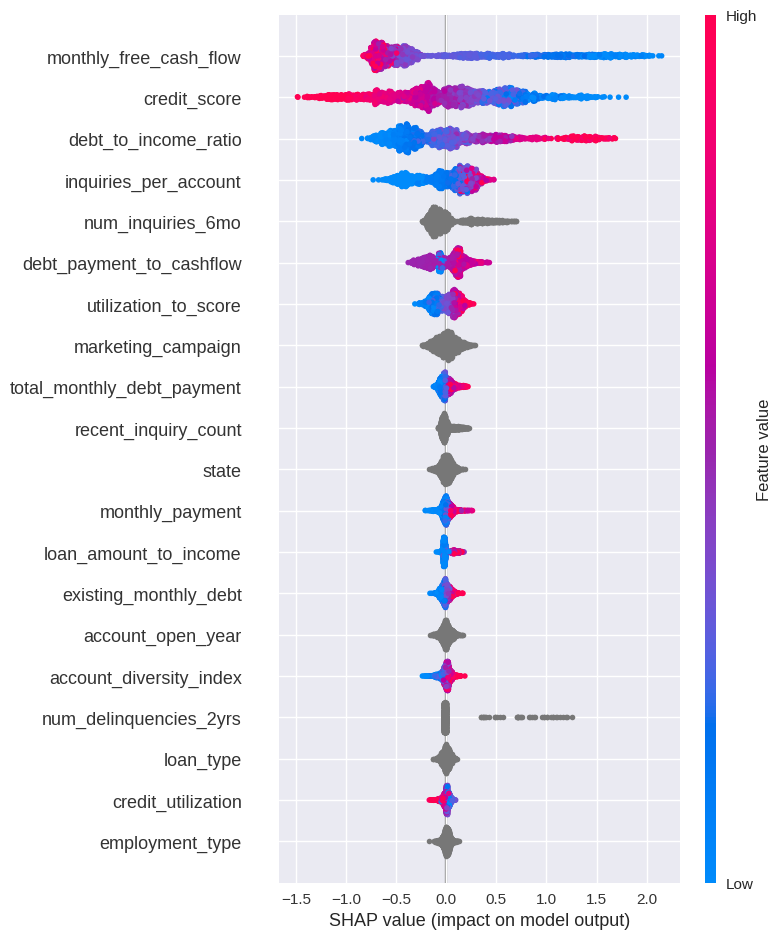

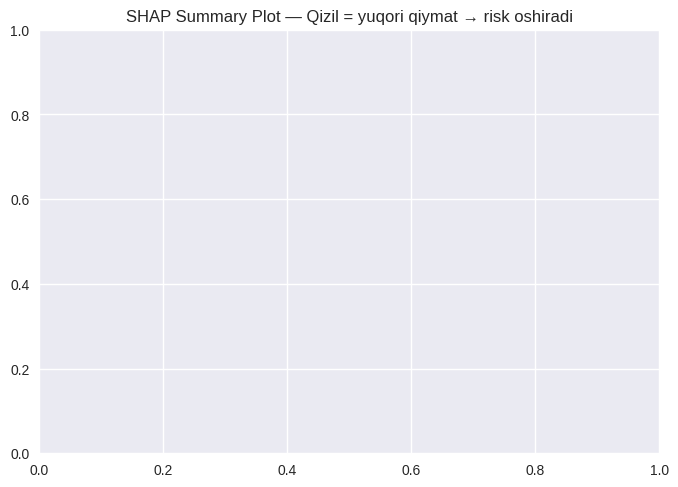

In [56]:
# 9.2.1 Bar plot — eng muhim 20 ta feature
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20)
plt.title('Top-20 Feature Importance (SHAP absolute value)')
plt.show()

# 9.2.2 Violin / Beeswarm plot — yo'nalish va ta'sir kuchi
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, max_display=20)
plt.title('SHAP Summary Plot — Qizil = yuqori qiymat → risk oshiradi')
plt.show()

## Final Submission

In [60]:

final_submission = pd.DataFrame({
    'customer_id': df.loc[X_test.index, 'customer_id'],
    'prob': best_pred,           
    'default': y_test.values 
})

final_submission['prob'] = final_submission['prob'].round(5)

final_submission.to_csv('results.csv', index=False)

print("Submission tayyor! Shape:", final_submission.shape)
print(final_submission.head(10))

Submission tayyor! Shape: (2001, 3)
      customer_id   prob  default
7569  107569.0000 0.3828        0
1953  101953.0000 0.4435        0
4646  104646.0000 0.3064        0
2558  102558.0000 0.4128        0
1399  101399.0000 0.7919        1
1097  101097.0000 0.5157        0
5667  105667.0000 0.1590        0
5148  105148.0000 0.9779        1
4647  104647.0000 0.3845        0
3995  103995.0000 0.5977        1
